# Team Task for Stage IV
##### Team Members
1. Keerthi Devireddy
2. Sony Annem
3. Supriya Kottam

## Collecting datasets for start_date = '2020-06-01'  end_date = '2021-01-03'  both cases and deaths

In [2]:
import pandas as pd
df = pd.read_csv('covid_confirmed_usafacts (1).csv')
cases= df.copy(deep=True)
metadata_columns = cases[['countyFIPS', 'County Name', 'State', 'StateFIPS']]
 
start_date = '2020-06-01'  
end_date = '2021-01-03'   

 
start_idx = cases.columns.get_loc(start_date)
end_idx = cases.columns.get_loc(end_date)

ourdates = cases.iloc[:, start_idx:end_idx+1 ]

june_jan_Cases = pd.concat([metadata_columns, ourdates], axis=1)
 
june_jan_Cases 

,countyFIPS,County Name,State,StateFIPS,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,233,238,239,241,248,259,...,3990,3999,4029,4065,4105,4164,4190,4239,4268,4305
2,1003,Baldwin County,AL,1,292,292,292,293,296,304,...,12666,12708,12825,12962,13172,13392,13601,13823,13955,14064
3,1005,Barbour County,AL,1,172,175,177,177,183,190,...,1396,1398,1406,1417,1462,1492,1514,1517,1528,1530
4,1007,Bibb County,AL,1,76,76,76,76,76,77,...,1725,1739,1746,1762,1792,1817,1834,1854,1863,1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,30,30,31,32,32,32,...,2820,2845,2854,2921,2929,2943,2966,2966,2992,3020
3189,56039,Teton County,WY,56,100,100,100,100,100,100,...,2039,2080,2080,2108,2112,2121,2138,2138,2145,2159
3190,56041,Uinta County,WY,56,12,13,13,13,19,19,...,1475,1495,1497,1507,1521,1540,1558,1558,1569,1570
3191,56043,Washakie County,WY,56,37,37,37,39,39,39,...,726,747,747,763,764,768,781,781,782,783


In [3]:
cases_daywise = june_jan_Cases.loc[:,('countyFIPS','County Name','State','StateFIPS')]
cases_daywise=pd.melt(june_jan_Cases,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'cases')
cases_daywise

,countyFIPS,County Name,State,StateFIPS,Date,cases
0,0,Statewide Unallocated,AL,1,2020-06-01,0
1,1001,Autauga County,AL,1,2020-06-01,233
2,1003,Baldwin County,AL,1,2020-06-01,292
3,1005,Barbour County,AL,1,2020-06-01,172
4,1007,Bibb County,AL,1,2020-06-01,76
...,...,...,...,...,...,...
692876,56037,Sweetwater County,WY,56,2021-01-03,3020
692877,56039,Teton County,WY,56,2021-01-03,2159
692878,56041,Uinta County,WY,56,2021-01-03,1570
692879,56043,Washakie County,WY,56,2021-01-03,783


In [4]:
grouped = cases_daywise.groupby('Date')

# Calculate the new cases for each group (date)
cases_daywise['New_Cases'] = grouped['cases'].diff().fillna(0)

# Set negative new cases to zero
cases_daywise['New_Cases'] = cases_daywise['New_Cases'].apply(lambda x: max(0, x))
cases_daywise

,countyFIPS,County Name,State,StateFIPS,Date,cases,New_Cases
0,0,Statewide Unallocated,AL,1,2020-06-01,0,0.0
1,1001,Autauga County,AL,1,2020-06-01,233,233.0
2,1003,Baldwin County,AL,1,2020-06-01,292,59.0
3,1005,Barbour County,AL,1,2020-06-01,172,0.0
4,1007,Bibb County,AL,1,2020-06-01,76,0.0
...,...,...,...,...,...,...,...
692876,56037,Sweetwater County,WY,56,2021-01-03,3020,2421.0
692877,56039,Teton County,WY,56,2021-01-03,2159,0.0
692878,56041,Uinta County,WY,56,2021-01-03,1570,0.0
692879,56043,Washakie County,WY,56,2021-01-03,783,0.0


## Date Wise Cases

In [5]:
 
daywise = cases_daywise.groupby(['Date'])['New_Cases'].sum().reset_index()
 
daywise

,Date,New_Cases
0,2020-06-01,1444652.0
1,2020-06-02,1460421.0
2,2020-06-03,1476976.0
3,2020-06-04,1493849.0
4,2020-06-05,1516299.0
...,...,...
212,2020-12-30,13930462.0
213,2020-12-31,14108294.0
214,2021-01-01,14221454.0
215,2021-01-02,14374204.0


In [11]:
import pandas as pd
df1 = pd.read_csv('covid_deaths_usafacts (1).csv')
deaths= df1.copy(deep=True)
metadata_columns = deaths[['countyFIPS', 'County Name', 'State', 'StateFIPS']]
 
start_date = '2020-06-01'  
end_date = '2021-01-03'   

 
start_idx = deaths.columns.get_loc(start_date)
end_idx = deaths.columns.get_loc(end_date)

ourdates = deaths.iloc[:, start_idx:end_idx+1 ]
#as we will lose first 4 columns we will use concat function 
# Concatenate the metadata columns and the required date range columns
june_jan_Deaths = pd.concat([metadata_columns, ourdates], axis=1)
 
june_jan_Deaths 

,countyFIPS,County Name,State,StateFIPS,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,5,5,5,5,5,5,...,46,46,47,47,47,48,48,50,50,50
2,1003,Baldwin County,AL,1,9,9,9,9,9,9,...,151,151,152,152,156,160,161,169,169,169
3,1005,Barbour County,AL,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,33,33,33
4,1007,Bibb County,AL,1,1,1,1,1,1,1,...,42,42,42,42,42,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,15,15,15,15,15,15,16,16,16,16
3189,56039,Teton County,WY,56,1,1,1,1,1,1,...,2,2,2,3,3,3,4,4,4,4
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3191,56043,Washakie County,WY,56,3,3,3,3,3,3,...,11,11,11,16,16,16,19,19,19,19


In [16]:
deaths_daywise = june_jan_Deaths.loc[:,('countyFIPS','County Name','State','StateFIPS')]
deaths_daywise=pd.melt(june_jan_Deaths,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'deaths')
 
grouped = deaths_daywise.groupby('Date')

# Calculate the new cases for each group (date)
deaths_daywise['New_Deaths'] = grouped['deaths'].diff().fillna(0)

# Set negative new cases to zero
deaths_daywise['New_Deaths'] = deaths_daywise['New_Deaths'].apply(lambda x: max(0, x))
deaths_daywise

,countyFIPS,County Name,State,StateFIPS,Date,deaths,New_Deaths
0,0,Statewide Unallocated,AL,1,2020-06-01,0,0.0
1,1001,Autauga County,AL,1,2020-06-01,5,5.0
2,1003,Baldwin County,AL,1,2020-06-01,9,4.0
3,1005,Barbour County,AL,1,2020-06-01,1,0.0
4,1007,Bibb County,AL,1,2020-06-01,1,0.0
...,...,...,...,...,...,...,...
692876,56037,Sweetwater County,WY,56,2021-01-03,16,10.0
692877,56039,Teton County,WY,56,2021-01-03,4,0.0
692878,56041,Uinta County,WY,56,2021-01-03,7,3.0
692879,56043,Washakie County,WY,56,2021-01-03,19,12.0


## Date Wise Deaths

In [20]:
ddaywise = deaths_daywise.groupby(['Date'])['New_Deaths'].sum().reset_index()
ddaywise['New_Deaths'] = ddaywise['New_Deaths'].astype(int)
ddaywise
 

,Date,New_Deaths
0,2020-06-01,84889
1,2020-06-02,85831
2,2020-06-03,86550
3,2020-06-04,87320
4,2020-06-05,88222
...,...,...
212,2020-12-30,247551
213,2020-12-31,249817
214,2021-01-01,251395
215,2021-01-02,253780


# Linear model for cases
# dates from 2020.06.01 to 2021.01.03

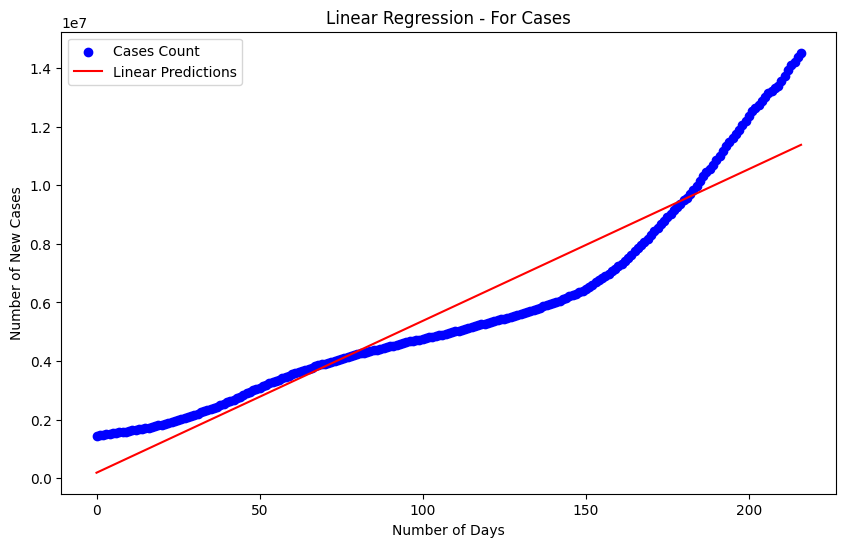

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
daywise_filtered = daywise[(daywise['Date'] >= start_date) & (daywise['Date'] <= end_date)]

daywise_filtered['Days'] = (daywise_filtered['Date'] - start_date).dt.days

linear_model_cases = LinearRegression().fit(daywise_filtered[['Days']], daywise_filtered['New_Cases'])

daywise_filtered['Linear_Predictions_Cases'] = linear_model_cases.predict(daywise_filtered[['Days']])

plt.figure(figsize=(10, 6))

plt.scatter(daywise_filtered['Days'], daywise_filtered['New_Cases'], label='Cases Count', color='blue')
plt.plot(daywise_filtered['Days'], daywise_filtered['Linear_Predictions_Cases'], label='Linear Predictions', color='red')
plt.title('Linear Regression - For Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Cases')
plt.legend()

plt.show()


## Non-Linear model for cases with Degree 2

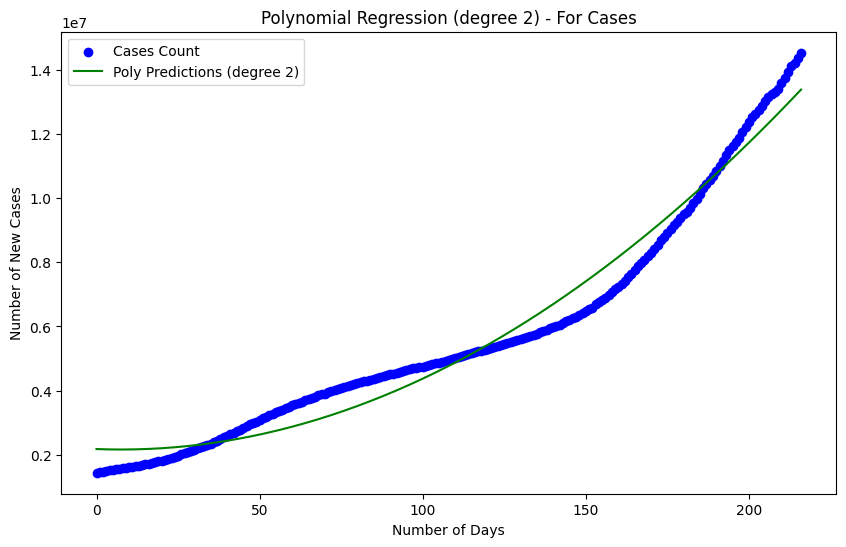

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
daywise_filtered = daywise[(daywise['Date'] >= start_date) & (daywise['Date'] <= end_date)]

daywise_filtered['Days'] = (daywise_filtered['Date'] - start_date).dt.days

n = 2  # degree
poly_features = PolynomialFeatures(degree=n)
X_poly = poly_features.fit_transform(daywise_filtered[['Days']])
poly_model_cases = LinearRegression().fit(X_poly, daywise_filtered['New_Cases'])

daywise_filtered['Poly_Predictions_Cases'] = poly_model_cases.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.scatter(daywise_filtered['Days'], daywise_filtered['New_Cases'], label='Cases Count', color='blue')
plt.plot(daywise_filtered['Days'], daywise_filtered['Poly_Predictions_Cases'], label=f'Poly Predictions (degree {n})', color='green')
plt.title(f'Polynomial Regression (degree {n}) - For Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Cases')
plt.legend()

plt.show()


## Non-Linear model for cases with Degree 3

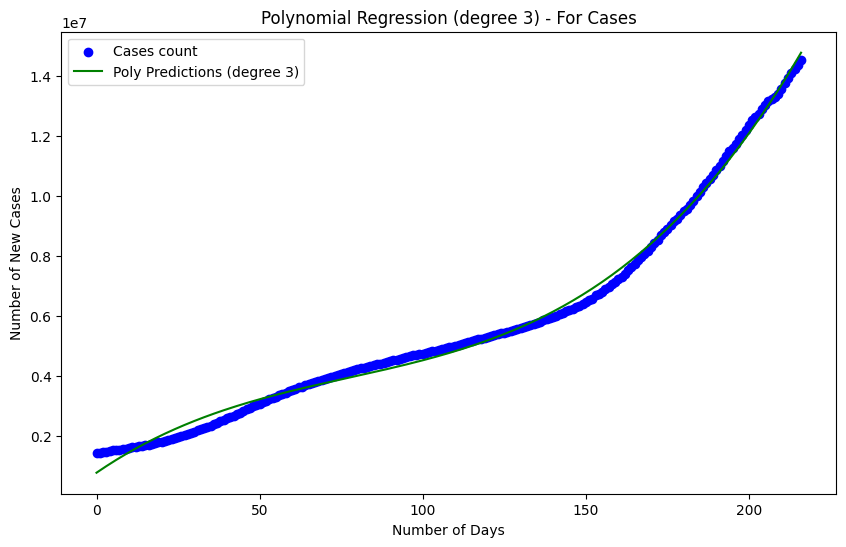

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')

daywise_filtered = daywise[(daywise['Date'] >= start_date) & (daywise['Date'] <= end_date)]
daywise_filtered['Days'] = (daywise_filtered['Date'] - start_date).dt.days
n = 3
poly_features = PolynomialFeatures(degree=n)

X_poly = poly_features.fit_transform(daywise_filtered[['Days']])
poly_model_cases = LinearRegression().fit(X_poly, daywise_filtered['New_Cases'])

daywise_filtered['Poly_Predictions_Cases'] = poly_model_cases.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.scatter(daywise_filtered['Days'], daywise_filtered['New_Cases'], label='Cases count', color='blue')
plt.plot(daywise_filtered['Days'], daywise_filtered['Poly_Predictions_Cases'], label=f'Poly Predictions (degree {n})', color='green')
plt.title(f'Polynomial Regression (degree {n}) - For Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Cases')
plt.legend()
plt.show()





## It seems that degree 3 is thebest fit so we used DEGREE 3 for calculaying RMSE

In [40]:
# RMSE
linear_predictions_cases = linear_model_cases.predict(daywise_filtered[['Days']])
linear_rmse_cases = np.sqrt(mean_squared_error(daywise_filtered['New_Cases'], linear_predictions_cases))

poly_features_test = PolynomialFeatures(degree=n)
X_poly_test = poly_features_test.fit_transform(daywise_filtered[['Days']])
poly_predictions_cases = poly_model_cases.predict(X_poly_test)
poly_rmse_cases = np.sqrt(mean_squared_error(daywise_filtered['New_Cases'], poly_predictions_cases))

print(f'Linear Regression RMSE for Cases: {linear_rmse_cases}')
print(f'Polynomial Regression RMSE (degree {n}) for Cases: {poly_rmse_cases}')

Linear Regression RMSE for Cases: 1077100.3859896038
Polynomial Regression RMSE (degree 3) for Cases: 219889.9577958918


### the polynomial regression model with degree 3 has a significantly lower RMSE compared to the linear regression model. This suggests that the polynomial model might be capturing more complex patterns in the data, leading to better predictions.

The linear regression model has an RMSE of approximately 1,077,100. This value represents the square root of the average squared differences between the predicted and actual values for new cases. An RMSE of 1,077,100 suggests that, on average, the linear regression model's predictions are off by approximately 1,077,100 new cases. This is a relatively large error, indicating that the linear model might not capture the underlying complexity of the data well.
The polynomial regression model (degree 3) has a lower RMSE of approximately 219,890 compared to the linear model. A lower RMSE indicates better predictive accuracy.
An RMSE of 219,890 suggests that, on average, the polynomial regression model's predictions are off by approximately 219,890 new cases. This is a significant improvement over the linear model.
The polynomial model of degree 3 is likely better at capturing the non-linear patterns in the data compared to the linear model.


## Linear model for Deaths

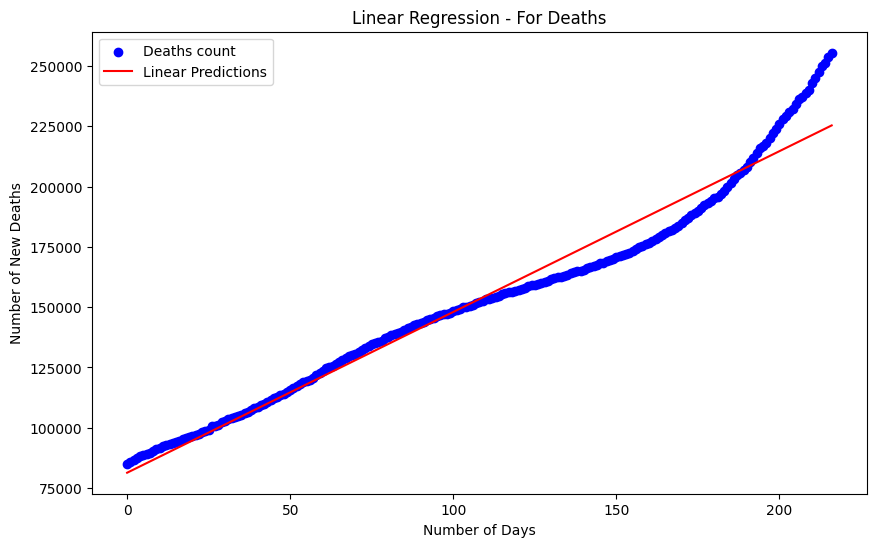

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


ddaywise['Date'] = pd.to_datetime(ddaywise['Date'])

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
ddaywise_filtered = ddaywise[(ddaywise['Date'] >= start_date) & (ddaywise['Date'] <= end_date)]

ddaywise_filtered['Days'] = (ddaywise_filtered['Date'] - start_date).dt.days

linear_model_deaths = LinearRegression().fit(ddaywise_filtered[['Days']], ddaywise_filtered['New_Deaths'])
ddaywise_filtered['Linear_Predictions_Deaths'] = linear_model_deaths.predict(ddaywise_filtered[['Days']])
plt.figure(figsize=(10, 6))

plt.scatter(ddaywise_filtered['Days'], ddaywise_filtered['New_Deaths'], label='Deaths count', color='blue')
plt.plot(ddaywise_filtered['Days'], ddaywise_filtered['Linear_Predictions_Deaths'], label='Linear Predictions', color='red')
plt.title('Linear Regression - For Deaths')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Deaths')
plt.legend()

plt.show()


## Non Linear model for Deaths degree 2

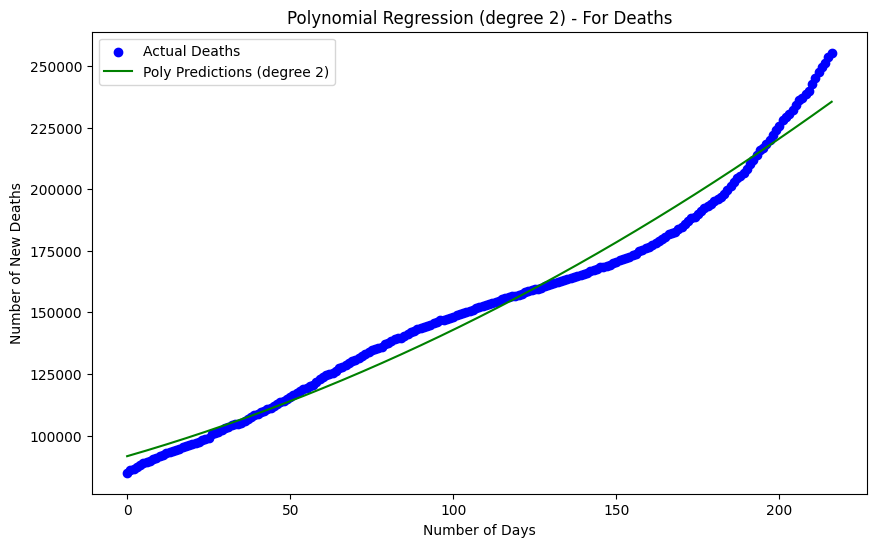

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

ddaywise['Date'] = pd.to_datetime(ddaywise['Date'])
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
ddaywise_filtered = ddaywise[(ddaywise['Date'] >= start_date) & (ddaywise['Date'] <= end_date)]

ddaywise_filtered['Days'] = (ddaywise_filtered['Date'] - start_date).dt.days

degree = 2
poly_model_deaths = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model_deaths.fit(ddaywise_filtered[['Days']], ddaywise_filtered['New_Deaths'])
ddaywise_filtered['Poly_Predictions_Deaths'] = poly_model_deaths.predict(ddaywise_filtered[['Days']])

plt.figure(figsize=(10, 6))

plt.scatter(ddaywise_filtered['Days'], ddaywise_filtered['New_Deaths'], label='Actual Deaths', color='blue')
plt.plot(ddaywise_filtered['Days'], ddaywise_filtered['Poly_Predictions_Deaths'], label=f'Poly Predictions (degree {degree})', color='green')
plt.title(f'Polynomial Regression (degree {degree}) - For Deaths')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Deaths')
plt.legend()

plt.show()


## Non Linear model for Deaths degree 3

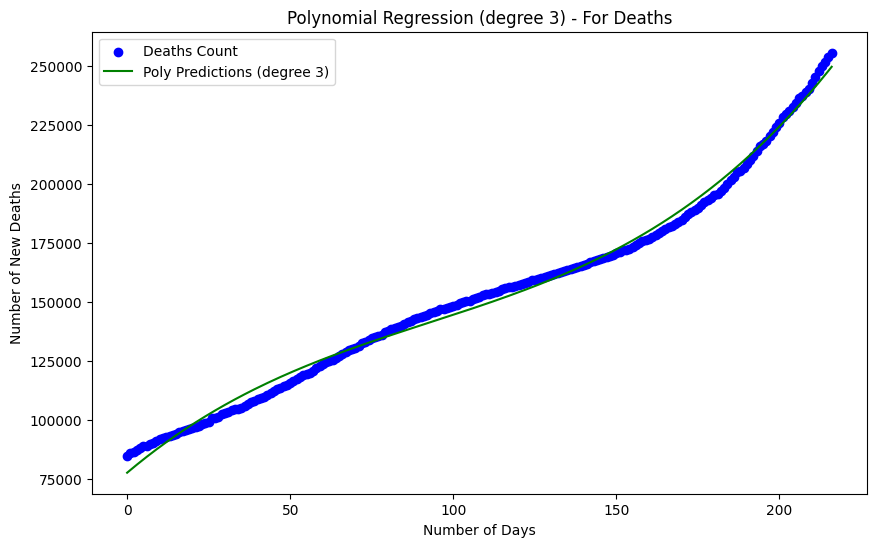

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

ddaywise['Date'] = pd.to_datetime(ddaywise['Date'])
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
ddaywise_filtered = ddaywise[(ddaywise['Date'] >= start_date) & (ddaywise['Date'] <= end_date)]

ddaywise_filtered['Days'] = (ddaywise_filtered['Date'] - start_date).dt.days
degree = 3
poly_model_deaths = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model_deaths.fit(ddaywise_filtered[['Days']], ddaywise_filtered['New_Deaths'])
ddaywise_filtered['Poly_Predictions_Deaths'] = poly_model_deaths.predict(ddaywise_filtered[['Days']])
plt.figure(figsize=(10, 6))
plt.scatter(ddaywise_filtered['Days'], ddaywise_filtered['New_Deaths'], label='Deaths Count', color='blue')
plt.plot(ddaywise_filtered['Days'], ddaywise_filtered['Poly_Predictions_Deaths'], label=f'Poly Predictions (degree {degree})', color='green')
plt.title(f'Polynomial Regression (degree {degree}) - For Deaths')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Deaths')
plt.legend()

plt.show()


## It seems that degree 3 is thebest fit so we used DEGREE 3 for calculating RMSE

In [32]:
from sklearn.metrics import mean_squared_error

linear_predictions = linear_model_deaths.predict(ddaywise_filtered[['Days']])
linear_rmse = np.sqrt(mean_squared_error(ddaywise_filtered['New_Deaths'], linear_predictions))

poly_predictions = poly_model_deaths.predict(ddaywise_filtered[['Days']])
poly_rmse = np.sqrt(mean_squared_error(ddaywise_filtered['New_Deaths'], poly_predictions))

print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Polynomial Regression RMSE (degree {degree}): {poly_rmse}')


Linear Regression RMSE: 7858.18203984018
Polynomial Regression RMSE (degree 3): 3295.3434796269894


Linear Regression RMSE: 7858.18203984018

The linear regression model has an RMSE of approximately 7,858. This value represents the square root of the average squared differences between the predicted and actual values for new cases. A lower RMSE indicates better model performance.
An RMSE of 7,858 suggests that, on average, the linear regression model's predictions are off by approximately 7,858 new cases. This is a relatively moderate error, indicating that the linear model is making reasonably accurate predictions.

Polynomial Regression RMSE (degree 3): 3295.3434796269894

The polynomial regression model with a degree of 3 has a lower RMSE of approximately 3,295 compared to the linear model. A lower RMSE indicates better predictive accuracy.
An RMSE of 3,295 suggests that, on average, the polynomial regression model's predictions are off by approximately 3,295 new cases. This is a significant improvement over the linear model.
The polynomial model of degree 3 is likely better at capturing the non-linear patterns in the data compared to the linear model.

The improvement in RMSE from the linear model to the polynomial model suggests that the non-linear patterns in the data have a meaningful impact on predicting new cases.
It's important to note that while the polynomial model performs better in terms of RMSE, careful consideration should be given to the choice of the polynomial degree to avoid overfitting. Higher-degree polynomials can fit the training data too closely, capturing noise and leading to poor generalization on new data.

## Discuss bias versus variance tradeoff. For a given model, the bias can be calculated as the squared difference between the average predicted value and the true values across different datasets.

Bias-Variance Tradeoff for Predicting Cases and Deaths:

Linear Model:
Bias:

The linear regression model is relatively simple and makes assumptions about a linear relationship between input features and the target variable.
If the underlying relationship is more complex, the linear model might have high bias, leading to underfitting.
Variance:

Linear models typically have lower variance, making them less sensitive to variations in the training data.
However, they might not capture intricate patterns in the data.

Polynomial Model (Degree 3):
Bias:

The polynomial model of degree 3 is more flexible and can capture non-linear relationships in the data.
It is expected to have lower bias compared to the linear model.
Variance:

Higher-degree polynomial models have the potential for higher variance, especially if the degree is too high.
They may fit the training data closely, capturing noise and leading to overfitting.

## Plot trend line along for the data along with the forecast of 1 week ahead (i.e. make prediction on 2021.01.04 - 2021.01.10). 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

daywise['Day'] = daywise['Date'].dt.day
daywise['Month'] = daywise['Date'].dt.month
daywise['Year'] = daywise['Date'].dt.year

ddaywise['Day'] = ddaywise['Date'].dt.day
ddaywise['Month'] = ddaywise['Date'].dt.month
ddaywise['Year'] = ddaywise['Date'].dt.year
X_cases = daywise[['Day', 'Month', 'Year']]
y_cases = daywise['New_Cases']

poly_features_cases = PolynomialFeatures(degree=3)
X_poly_cases = poly_features_cases.fit_transform(X_cases)
poly_model_cases = LinearRegression().fit(X_poly_cases, y_cases)

X_deaths = ddaywise[['Day', 'Month', 'Year']]
y_deaths = ddaywise['New_Deaths']
poly_features_deaths = PolynomialFeatures(degree=3)
X_poly_deaths = poly_features_deaths.fit_transform(X_deaths)
poly_model_deaths = LinearRegression().fit(X_poly_deaths, y_deaths)
forecast_start_date = '2021-01-04'
forecast_end_date = '2021-01-10'
forecast_dates = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Day': forecast_dates.day, 'Month': forecast_dates.month, 'Year': forecast_dates.year})
forecast_data['Cases_Forecast'] = poly_model_cases.predict(poly_features_cases.transform(forecast_data[['Day', 'Month', 'Year']]))
forecast_data['Deaths_Forecast'] = poly_model_deaths.predict(poly_features_deaths.transform(forecast_data[['Day', 'Month', 'Year']]))


# forecast_dates = pd.date_range(forecast_start_date, forecast_end_date)
# forecast_data = pd.DataFrame({'Date': forecast_dates, 'Day': forecast_dates.day, 'Month': forecast_dates.month, 'Year': forecast_dates.year})
# forecast_data['Cases_Forecast'] = poly_model_cases.predict(poly_features_cases.transform(forecast_data[['Day', 'Month', 'Year']]))
# forecast_data['Deaths_Forecast'] = poly_model_deaths.predict(poly_features_deaths.transform(forecast_data[['Day', 'Month', 'Year']]))




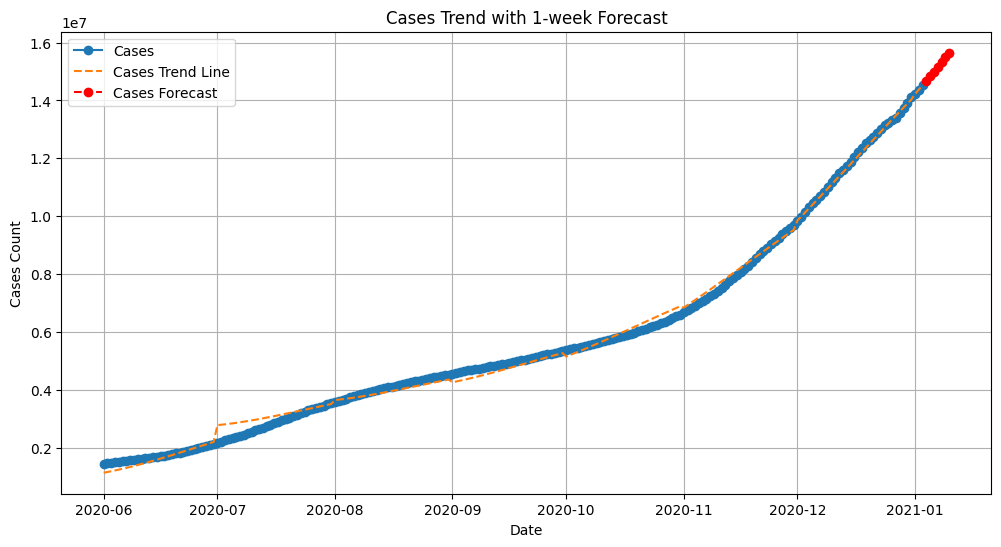

In [63]:
#Cases
plt.figure(figsize=(12, 6))
plt.plot(daywise['Date'], daywise['New_Cases'], label='Cases', marker='o')
plt.plot(daywise['Date'], poly_model_cases.predict(X_poly_cases), label='Cases Trend Line', linestyle='--')
plt.plot(forecast_data['Date'], forecast_data['Cases_Forecast'], label='Cases Forecast', linestyle='--', marker='o', color='red')
plt.title('Cases Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.legend()
plt.grid(True)
plt.show()


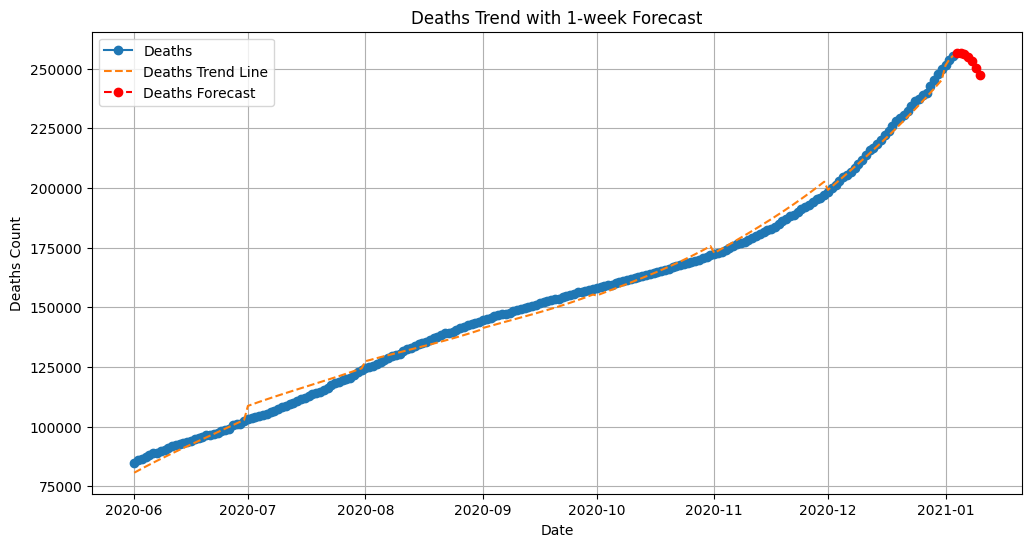

In [62]:
#  Deaths
plt.figure(figsize=(12, 6))
plt.plot(ddaywise['Date'], ddaywise['New_Deaths'], label='Deaths', marker='o')
plt.plot(ddaywise['Date'], poly_model_deaths.predict(X_poly_deaths), label='Deaths Trend Line', linestyle='--')
plt.plot(forecast_data['Date'], forecast_data['Deaths_Forecast'], label='Deaths Forecast', linestyle='--', marker='o', color='red')
plt.title('Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Deaths Count')
plt.legend()
plt.grid(True)
plt.show()

## Printing Predicted normalized values

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

daywise['Day'] = daywise['Date'].dt.day
daywise['Month'] = daywise['Date'].dt.month
daywise['Year'] = daywise['Date'].dt.year
ddaywise['Day'] = ddaywise['Date'].dt.day
ddaywise['Month'] = ddaywise['Date'].dt.month
ddaywise['Year'] = ddaywise['Date'].dt.year
X_cases = daywise[['Day', 'Month', 'Year']]
y_cases = daywise['New_Cases']
poly_features_cases = PolynomialFeatures(degree=3)
X_poly_cases = poly_features_cases.fit_transform(X_cases)
poly_model_cases = LinearRegression().fit(X_poly_cases, y_cases)

X_deaths = ddaywise[['Day', 'Month', 'Year']]
y_deaths = ddaywise['New_Deaths']
poly_features_deaths = PolynomialFeatures(degree=3)
X_poly_deaths = poly_features_deaths.fit_transform(X_deaths)
poly_model_deaths = LinearRegression().fit(X_poly_deaths, y_deaths)
forecast_start_date = '2021-01-04'
forecast_end_date = '2021-01-10'
forecast_dates = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Day': forecast_dates.day, 'Month': forecast_dates.month, 'Year': forecast_dates.year})
forecast_data['Cases_Forecast'] = poly_model_cases.predict(poly_features_cases.transform(forecast_data[['Day', 'Month', 'Year']]))
forecast_data['Deaths_Forecast'] = poly_model_deaths.predict(poly_features_deaths.transform(forecast_data[['Day', 'Month', 'Year']]))
print(f'Cases Trend Coefficients: {poly_model_cases.coef_}')
print(f'Deaths Trend Coefficients: {poly_model_deaths.coef_}')



Cases Trend Coefficients: [ 0.00000000e+00  1.03341899e+02  3.07562871e-04  4.82512651e-04
  2.53117941e+05  5.16404558e+01  1.04408865e+05 -5.47857223e-01
  2.84500201e-03  1.81612513e-03 -1.00183556e+01 -5.09720741e+01
 -1.24775302e+02  5.91707569e+03 -4.35027766e+01 -5.16051860e+01
  8.76519240e+04 -1.10666190e+03  4.79973939e+00  4.20263220e+00]
Deaths Trend Coefficients: [ 0.00000000e+00  1.05931340e+00  8.47656143e-04  1.33397569e-03
  6.94467835e+05  5.39795755e-01  1.09155981e+03 -5.01040709e-03
  1.31289235e-03  1.19574624e-03  1.16155148e-01  1.60784991e+00
 -3.43804374e+02  7.36326080e+01 -6.18282493e-01 -5.38973702e-01
  7.46687718e+02 -1.00944882e+01  4.86555029e-02  4.96297299e-02]


## Describe the trends as compared to other countries. (5 points)


## Making dataset for the dates 2020.06.01 (Monday) to 2021.01.03 (Sunday)

In [73]:
df_cases=pd.read_csv("covid_confirmed_usafacts (1).csv")
df_deaths=pd.read_csv("covid_deaths_usafacts (1).csv")
df_population=pd.read_csv("covid_county_population_usafacts (1).csv")
Merge_df = pd.merge(df_cases,df_deaths,on=('countyFIPS','County Name','State','StateFIPS'),how='outer')
df_population=df_population.drop(['County Name','State'],axis=1)
df_supercovid19=pd.merge(Merge_df,df_population, on=('countyFIPS'))
df_supercovid19

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-15_y,2023-07-16_y,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,42343
5739,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
5741,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,7805


In [74]:
import pandas as pd

start_date = '2020-06-01'
end_date = '2021-01-03'

date_columns = [col for col in df_supercovid19.columns if col.startswith('2020') or col.startswith('2021')]
columns_to_keep = ['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'] + date_columns

# Filter the data
filtered_data = df_supercovid19[columns_to_keep]

# Convert date columns to datetime format
filtered_data[date_columns] = filtered_data[date_columns].apply(pd.to_datetime)

# Filter based on date range
filtered_data = filtered_data[(filtered_data[date_columns].max(axis=1) >= start_date) & (filtered_data[date_columns].min(axis=1) <= end_date)]

# Melt the DataFrame to have 'date' and 'cases' columns
cases = pd.melt(filtered_data, id_vars=['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], var_name='date', value_name='cases')

cases


C:\Users\annem\AppData\Local\Temp\ipykernel_10648\648097045.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[date_columns] = filtered_data[date_columns].apply(pd.to_datetime)


,countyFIPS,County Name,State,StateFIPS,population,date,cases


In [75]:
formats_to_remove=['2022-','2023-']
columns_to_keep = [col for col in df_supercovid19.columns if not any(format_to_remove in col for format_to_remove in formats_to_remove)]
df_filtered_dates = df_supercovid19[columns_to_keep]
df_filtered_dates

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2021-12-23_y,2021-12-24_y,2021-12-25_y,2021-12-26_y,2021-12-27_y,2021-12-28_y,2021-12-29_y,2021-12-30_y,2021-12-31_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,42343
5739,56039,Teton County,WY,56,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,20226
5741,56043,Washakie County,WY,56,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,7805


In [77]:
formats_to_remove=['2020-01-','2020-02-','2020-03-','2020-04','2020-05','2021-03','2021-02','2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09','2021-10','2021-11','2021-12']
columns_to_keep = [col for col in df_filtered_dates.columns if not any(format_to_remove in col for format_to_remove in formats_to_remove)]
df_filtered = df_filtered_dates[columns_to_keep]
df_filtered

,countyFIPS,County Name,State,StateFIPS,2020-06-01_x,2020-06-02_x,2020-06-03_x,2020-06-04_x,2020-06-05_x,2020-06-06_x,...,2021-01-23_y,2021-01-24_y,2021-01-25_y,2021-01-26_y,2021-01-27_y,2021-01-28_y,2021-01-29_y,2021-01-30_y,2021-01-31_y,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,30,30,31,32,32,32,...,30,30,30,32,32,32,32,32,32,42343
5739,56039,Teton County,WY,56,100,100,100,100,100,100,...,5,5,5,6,6,6,6,6,6,23464
5740,56041,Uinta County,WY,56,12,13,13,13,19,19,...,12,12,12,12,12,12,12,12,12,20226
5741,56043,Washakie County,WY,56,37,37,37,39,39,39,...,25,25,25,25,25,25,25,25,25,7805


In [78]:
# Creating cases dataframe seperately and removing _x suffix from column names.
ending_to_remove = '_y'
columns_to_keep = [col for col in df_filtered.columns if not col.endswith(ending_to_remove)]
cases=df_filtered[columns_to_keep]
suffix_to_remove='_x'
cases.columns = cases.columns.str.rstrip(suffix_to_remove)
cases

,countyFIPS,County Name,State,StateFIPS,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,...,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,30,30,31,32,32,32,...,3384,3411,3418,3421,3428,3440,3464,3472,3486,42343
5739,56039,Teton County,WY,56,100,100,100,100,100,100,...,2870,2931,2981,2993,3020,3028,3078,3078,3116,23464
5740,56041,Uinta County,WY,56,12,13,13,13,19,19,...,1887,1900,1913,1925,1948,1957,1959,1960,1963,20226
5741,56043,Washakie County,WY,56,37,37,37,39,39,39,...,853,858,861,863,864,864,864,864,866,7805


In [79]:
# Creating deaths dataframe seperately and removing _y suffix from column names.
ending_to_remove = '_x'
columns_to_keep = [col for col in df_filtered.columns if not col.endswith(ending_to_remove)]
deaths=df_filtered[columns_to_keep]
suffix_to_remove='_y'
deaths.columns = deaths.columns.str.rstrip(suffix_to_remove)
deaths

,countyFIPS,County Name,State,StateFIPS,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,...,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,30,30,30,32,32,32,32,32,32,42343
5739,56039,Teton County,WY,56,1,1,1,1,1,1,...,5,5,5,6,6,6,6,6,6,23464
5740,56041,Uinta County,WY,56,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,20226
5741,56043,Washakie County,WY,56,3,3,3,3,3,3,...,25,25,25,25,25,25,25,25,25,7805


In [80]:
# Transforming the dataset using melt function to convert the date columns as rows.
cases = cases.melt(id_vars=['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], var_name='date', value_name='cases')
cases.drop_duplicates()

,countyFIPS,County Name,State,StateFIPS,population,date,cases
0,0,Statewide Unallocated,AL,1,0,2020-06-01,0
51,0,Statewide Unallocated,AK,2,0,2020-06-01,2
102,0,Statewide Unallocated,AZ,4,0,2020-06-01,0
153,0,Statewide Unallocated,AR,5,0,2020-06-01,189
204,0,Statewide Unallocated,CA,6,0,2020-06-01,21
...,...,...,...,...,...,...,...
1407030,56037,Sweetwater County,WY,56,42343,2021-01-31,3486
1407031,56039,Teton County,WY,56,23464,2021-01-31,3116
1407032,56041,Uinta County,WY,56,20226,2021-01-31,1963
1407033,56043,Washakie County,WY,56,7805,2021-01-31,866


In [81]:
deaths = deaths.melt(id_vars=['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population'], var_name='date', value_name='deaths')
deaths.drop_duplicates()

,countyFIPS,County Name,State,StateFIPS,population,date,deaths
0,0,Statewide Unallocated,AL,1,0,2020-06-01,0
51,0,Statewide Unallocated,AK,2,0,2020-06-01,0
102,0,Statewide Unallocated,AZ,4,0,2020-06-01,0
153,0,Statewide Unallocated,AR,5,0,2020-06-01,0
204,0,Statewide Unallocated,CA,6,0,2020-06-01,0
...,...,...,...,...,...,...,...
1407030,56037,Sweetwater County,WY,56,42343,2021-01-31,32
1407031,56039,Teton County,WY,56,23464,2021-01-31,6
1407032,56041,Uinta County,WY,56,20226,2021-01-31,12
1407033,56043,Washakie County,WY,56,7805,2021-01-31,25


In [82]:
cases_deaths = pd.merge(cases,deaths,on=['countyFIPS','County Name','State','StateFIPS','population','date'])
cases_deaths=cases_deaths.drop_duplicates()

In [83]:
import pandas as pd

cases_deaths['date'] = pd.to_datetime(cases_deaths['date'])
start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2021-01-03')
date_list = pd.date_range(start=start_date, end=end_date, freq='D')
total_cases_list = []
total_deaths_list = []
total_population_list = []  

for date in date_list:
    date_mask = (cases_deaths['date'] == date)
    total_cases = cases_deaths[date_mask]['cases'].sum()
    total_deaths = cases_deaths[date_mask]['deaths'].sum()
    total_population = cases_deaths[date_mask]['population'].sum()  
    total_cases_list.append(total_cases)
    total_deaths_list.append(total_deaths)
    total_population_list.append(total_population)

US_cases_deaths_df = pd.DataFrame({
    'date': date_list,
    'total_cases': total_cases_list,
    'total_deaths': total_deaths_list,
    'total_population': total_population_list  
})

print(US_cases_deaths_df)


          date  total_cases  total_deaths  total_population
0   2020-07-01      2748327        128962         328239523
1   2020-07-02      2806125        129630         328239523
2   2020-07-03      2866754        130406         328239523
3   2020-07-04      2918327        130890         328239523
4   2020-07-05      2961395        131290         328239523
..         ...          ...           ...               ...
182 2020-12-30     19743342        351694         328239523
183 2020-12-31     19980329        355294         328239523
184 2021-01-01     20145536        357978         328239523
185 2021-01-02     20378433        361430         328239523
186 2021-01-03     20605299        363775         328239523

[187 rows x 4 columns]


In [85]:
# Choosing 5 similar population countries to compare.
Worldcoviddata=pd.read_csv("owid-covid-data.csv")
Worldcoviddata.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [86]:
# Grouping by location in order to find the similar population countries
grouped_df = Worldcoviddata.groupby('iso_code')['population'].sum().reset_index()
grouped_df

,iso_code,population
0,ABW,1.461682e+08
1,AFG,5.638755e+10
2,AGO,4.879251e+10
3,AIA,2.176737e+07
4,ALB,3.896818e+09
...,...,...
250,WSM,3.048967e+08
251,YEM,4.619806e+10
252,ZAF,8.211451e+10
253,ZMB,2.744423e+10


In [87]:
sorted_df = grouped_df.sort_values(by='population', ascending=False)
sorted_df.to_csv('population_world.csv')

In [88]:
Worldcoviddata_filtered=Worldcoviddata.loc[(Worldcoviddata['iso_code']=='IND')|(Worldcoviddata['iso_code']=='CHN')|
        (Worldcoviddata['iso_code']=='IDN')|(Worldcoviddata['iso_code']=='PAK')|(Worldcoviddata['iso_code']=='NGA')]
Worldcoviddata_filtered

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
60335,CHN,Asia,China,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
60336,CHN,Asia,China,2020-01-04,1.0,1.0,NaN,NaN,0.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
60337,CHN,Asia,China,2020-01-05,1.0,0.0,NaN,NaN,0.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
60338,CHN,Asia,China,2020-01-06,4.0,3.0,NaN,NaN,0.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
60339,CHN,Asia,China,2020-01-07,4.0,0.0,NaN,NaN,0.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234372,PAK,Asia,Pakistan,2023-09-30,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.60,67.27,0.557,2.358249e+08,NaN,NaN,NaN,NaN
234373,PAK,Asia,Pakistan,2023-10-01,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.60,67.27,0.557,2.358249e+08,NaN,NaN,NaN,NaN
234374,PAK,Asia,Pakistan,2023-10-02,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.60,67.27,0.557,2.358249e+08,NaN,NaN,NaN,NaN
234375,PAK,Asia,Pakistan,2023-10-03,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.60,67.27,0.557,2.358249e+08,NaN,NaN,NaN,NaN


In [90]:
# Convert the 'date' column to Timestamp type
Worldcoviddata_filtered['date'] = pd.to_datetime(Worldcoviddata_filtered['date'])
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
Worldcoviddata_filtered = Worldcoviddata_filtered[(Worldcoviddata_filtered['date'] >= start_date) & (Worldcoviddata_filtered['date'] <= end_date)]

print(Worldcoviddata_filtered)



       iso_code continent  location       date  total_cases  new_cases  \
60485       CHN      Asia     China 2020-06-01      84588.0       18.0   
60486       CHN      Asia     China 2020-06-02      84597.0        9.0   
60487       CHN      Asia     China 2020-06-03      84602.0        5.0   
60488       CHN      Asia     China 2020-06-04      84603.0        1.0   
60489       CHN      Asia     China 2020-06-05      84614.0       11.0   
...         ...       ...       ...        ...          ...        ...   
233368      PAK      Asia  Pakistan 2020-12-30     475085.0     1776.0   
233369      PAK      Asia  Pakistan 2020-12-31     477240.0     2155.0   
233370      PAK      Asia  Pakistan 2021-01-01     479715.0     2475.0   
233371      PAK      Asia  Pakistan 2021-01-02     482178.0     2463.0   
233372      PAK      Asia  Pakistan 2021-01-03     484362.0     2184.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
60485                7.429        

C:\Users\annem\AppData\Local\Temp\ipykernel_10648\644492579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Worldcoviddata_filtered['date'] = pd.to_datetime(Worldcoviddata_filtered['date'])


In [91]:
# Creating separate dataframes for each individual country.
Indiacoviddata= Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='IND']
Chinacoviddata= Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='CHN']
Indonesiacoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='IDN']
Pakisthancoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='PAK']
Nigeriacoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='NGA']

In [92]:
Indiacoviddata['date'] = pd.to_datetime(Indiacoviddata['date'])
Chinacoviddata['date'] = pd.to_datetime(Chinacoviddata['date'])
Indonesiacoviddata['date'] = pd.to_datetime(Indonesiacoviddata['date'])
Pakisthancoviddata['date'] = pd.to_datetime(Pakisthancoviddata['date'])
Nigeriacoviddata['date'] = pd.to_datetime(Nigeriacoviddata['date'])

C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2365914837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiacoviddata['date'] = pd.to_datetime(Indiacoviddata['date'])
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2365914837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chinacoviddata['date'] = pd.to_datetime(Chinacoviddata['date'])
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2365914837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

## normal trend line comparition

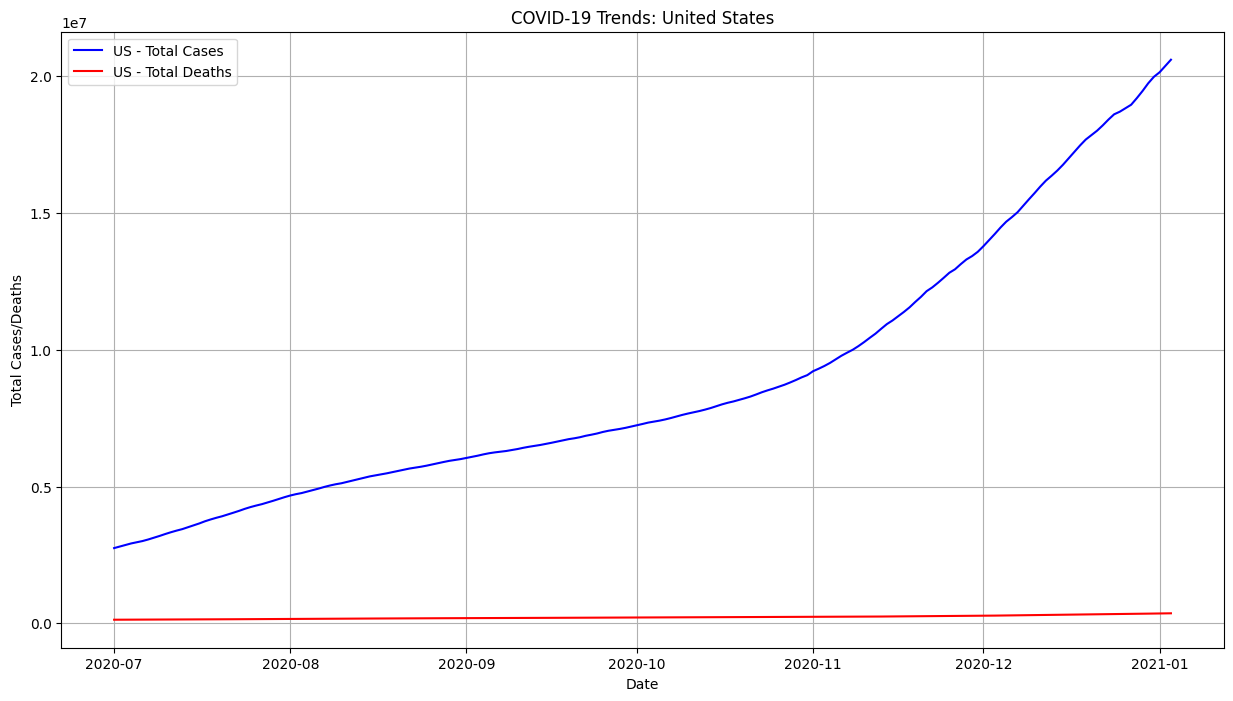

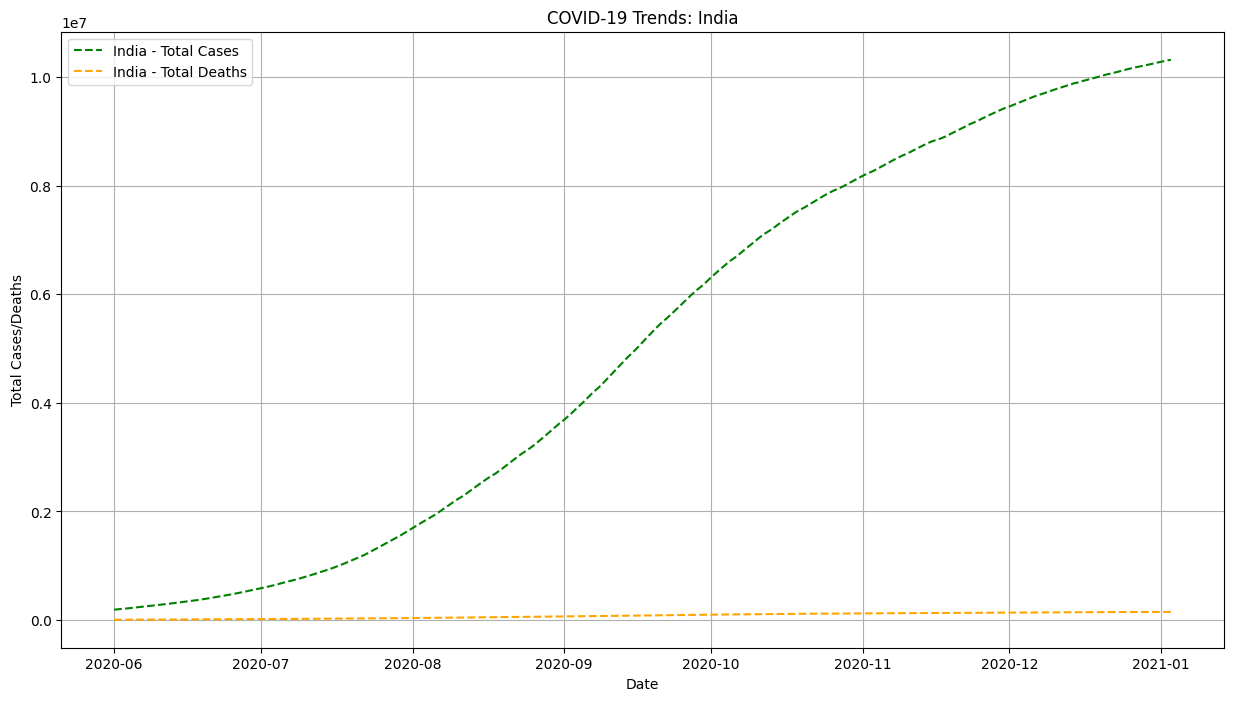

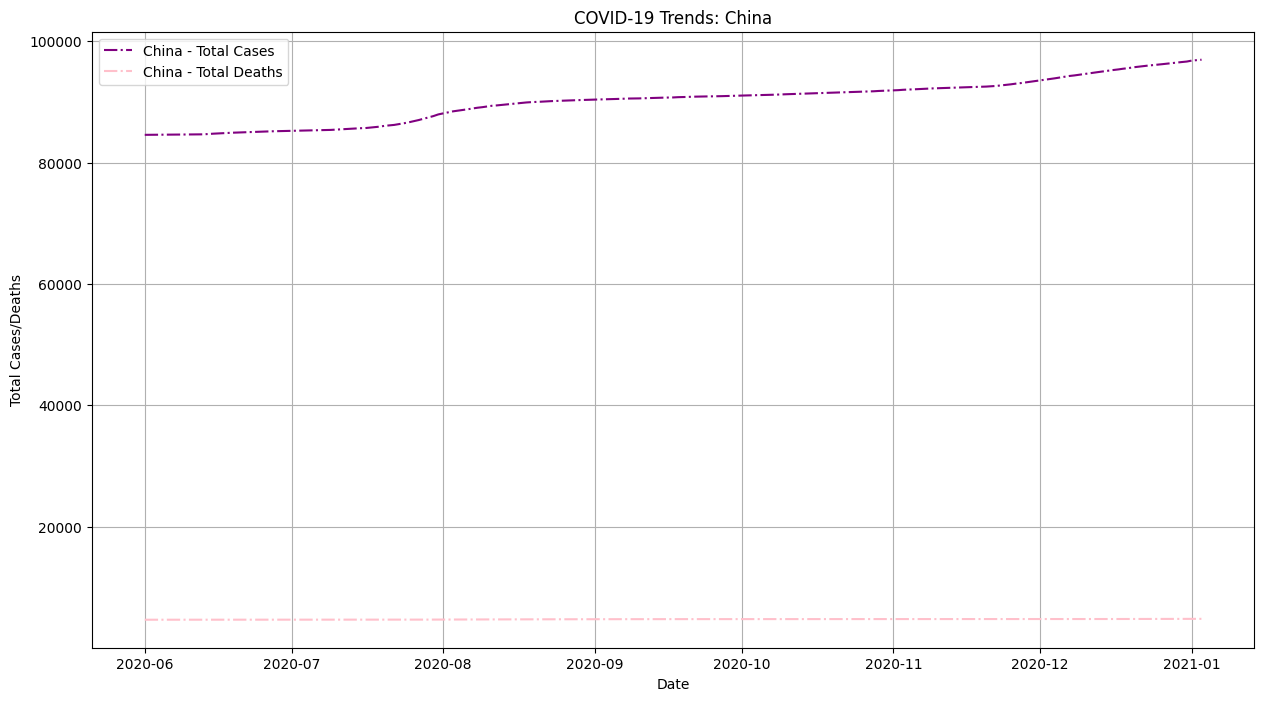

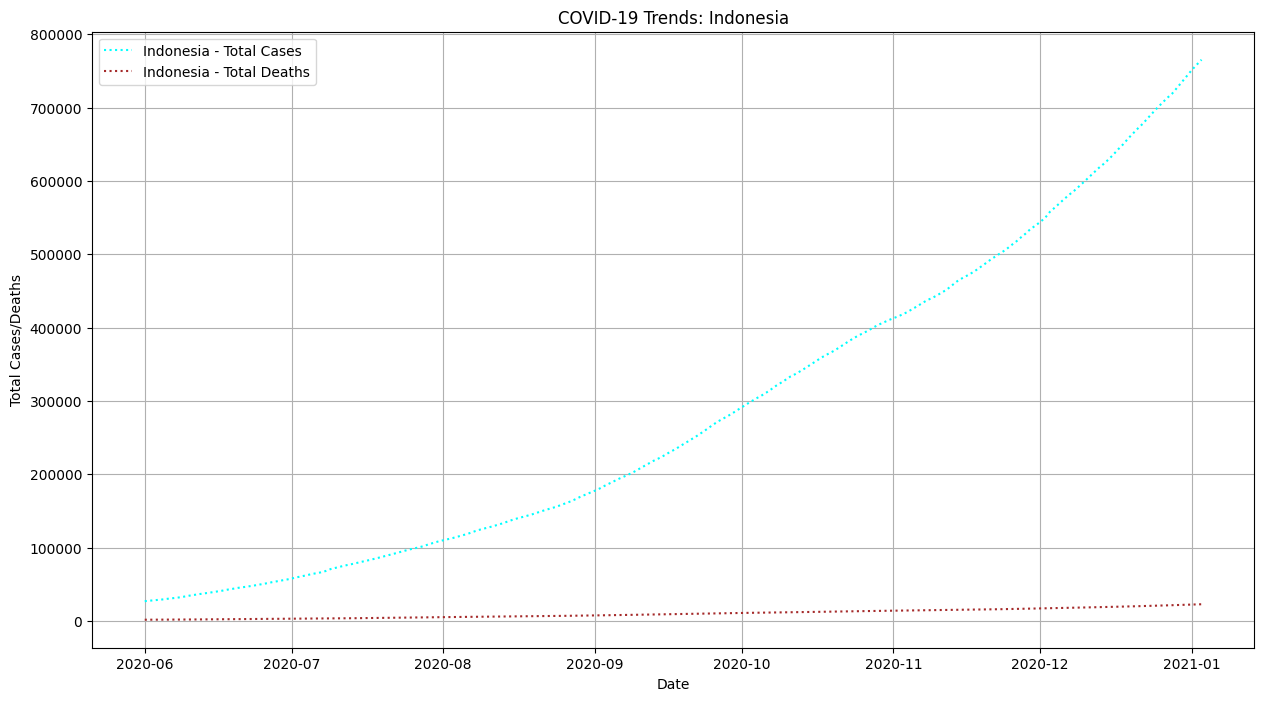

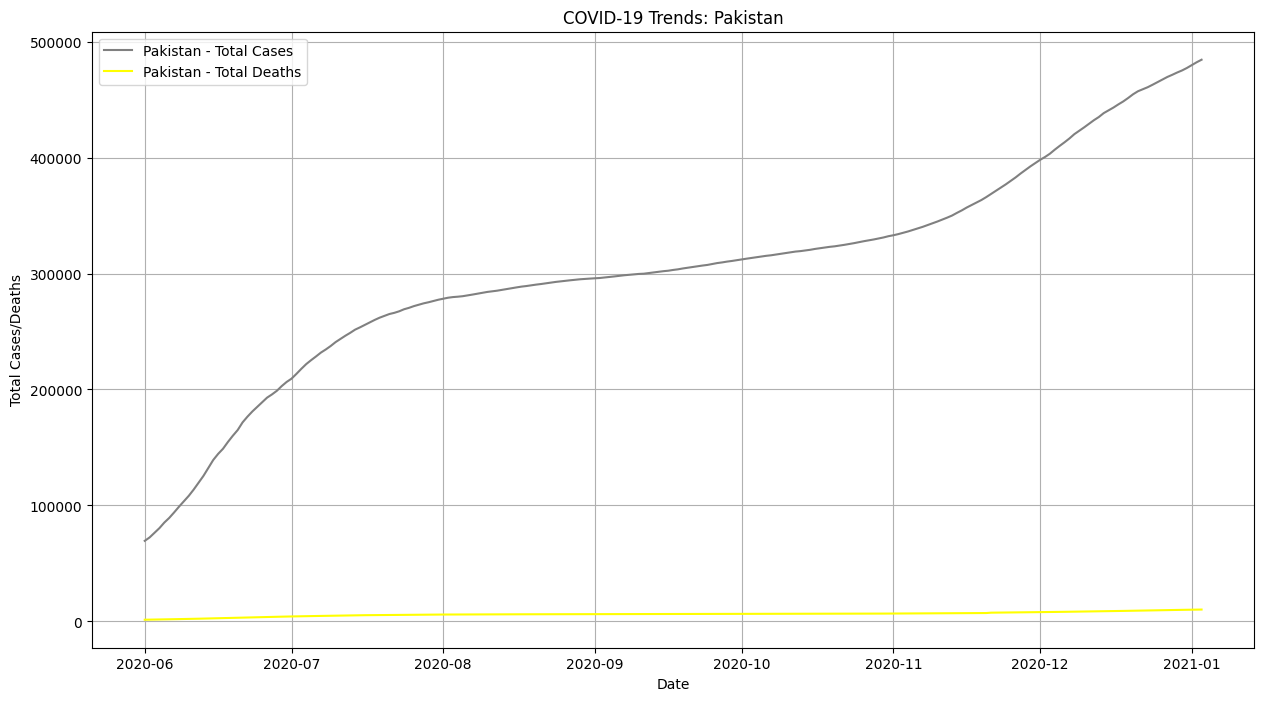

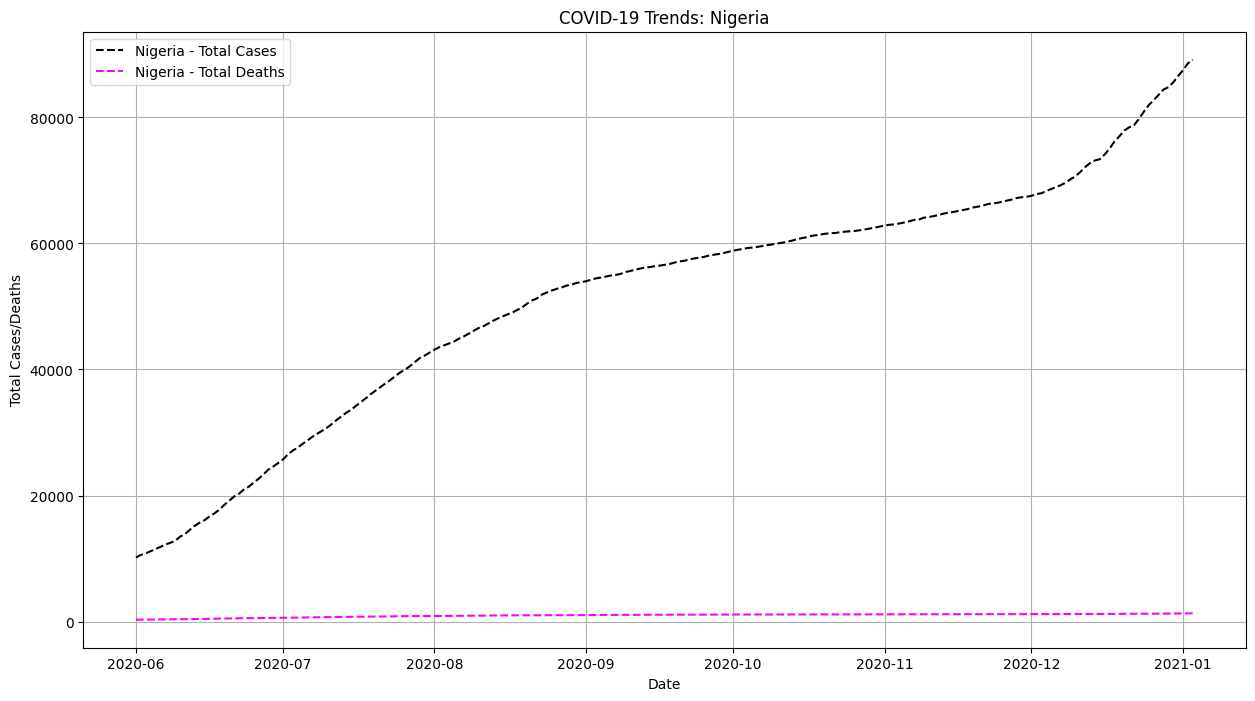

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
us_data = US_cases_deaths_df.set_index('date')
india_data = Indiacoviddata.set_index('date')
china_data = Chinacoviddata.set_index('date')
indonesia_data = Indonesiacoviddata.set_index('date')
pakistan_data = Pakisthancoviddata.set_index('date')
nigeria_data = Nigeriacoviddata.set_index('date')

# e United States
plt.figure(figsize=(15, 8))
plt.plot(us_data.index, us_data['total_cases'], label='US - Total Cases', linestyle='-', color='blue')
plt.plot(us_data.index, us_data['total_deaths'], label='US - Total Deaths', linestyle='-', color='red')
plt.title('COVID-19 Trends: United States')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

# for India
plt.figure(figsize=(15, 8))
plt.plot(india_data.index, india_data['total_cases'], label='India - Total Cases', linestyle='--', color='green')
plt.plot(india_data.index, india_data['total_deaths'], label='India - Total Deaths', linestyle='--', color='orange')
plt.title('COVID-19 Trends: India')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

# for China
plt.figure(figsize=(15, 8))
plt.plot(china_data.index, china_data['total_cases'], label='China - Total Cases', linestyle='-.', color='purple')
plt.plot(china_data.index, china_data['total_deaths'], label='China - Total Deaths', linestyle='-.', color='pink')
plt.title('COVID-19 Trends: China')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

#  for Indonesia
plt.figure(figsize=(15, 8))
plt.plot(indonesia_data.index, indonesia_data['total_cases'], label='Indonesia - Total Cases', linestyle=':', color='cyan')
plt.plot(indonesia_data.index, indonesia_data['total_deaths'], label='Indonesia - Total Deaths', linestyle=':', color='brown')
plt.title('COVID-19 Trends: Indonesia')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

# for Pakistan
plt.figure(figsize=(15, 8))
plt.plot(pakistan_data.index, pakistan_data['total_cases'], label='Pakistan - Total Cases', linestyle='-', color='gray')
plt.plot(pakistan_data.index, pakistan_data['total_deaths'], label='Pakistan - Total Deaths', linestyle='-', color='yellow')
plt.title('COVID-19 Trends: Pakistan')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

#  for Nigeria
plt.figure(figsize=(15, 8))
plt.plot(nigeria_data.index, nigeria_data['total_cases'], label='Nigeria - Total Cases', linestyle='--', color='black')
plt.plot(nigeria_data.index, nigeria_data['total_deaths'], label='Nigeria - Total Deaths', linestyle='--', color='magenta')
plt.title('COVID-19 Trends: Nigeria')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()


## Comparing future predicted cases trend line

## INDIA cases and deaths forecast

C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2692284472.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['date'] = pd.to_datetime(india_data['date'])
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2692284472.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['Day'] = india_data['date'].dt.day
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\2692284472.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

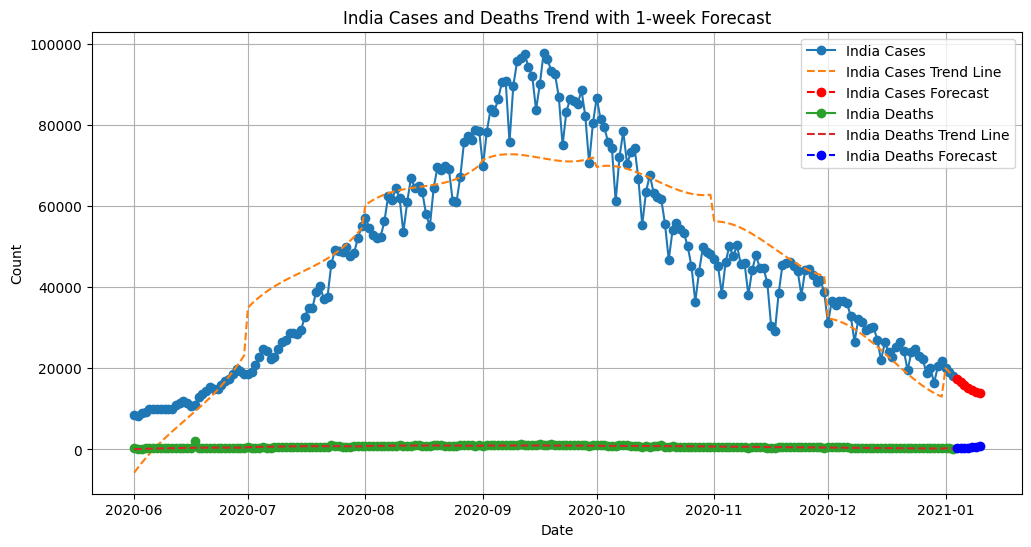

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

india_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'IND']
india_data['date'] = pd.to_datetime(india_data['date'])

india_data['Day'] = india_data['date'].dt.day
india_data['Month'] = india_data['date'].dt.month
india_data['Year'] = india_data['date'].dt.year

X_india_cases = india_data[['Day', 'Month', 'Year']]
y_india_cases = india_data['new_cases']

poly_features_india_cases = PolynomialFeatures(degree=3)
X_poly_india_cases = poly_features_india_cases.fit_transform(X_india_cases)
poly_model_india_cases = LinearRegression().fit(X_poly_india_cases, y_india_cases)

X_india_deaths = india_data[['Day', 'Month', 'Year']]
y_india_deaths = india_data['new_deaths']

poly_features_india_deaths = PolynomialFeatures(degree=3)
X_poly_india_deaths = poly_features_india_deaths.fit_transform(X_india_deaths)
poly_model_india_deaths = LinearRegression().fit(X_poly_india_deaths, y_india_deaths)

forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_india = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_india = pd.DataFrame({'Date': forecast_dates_india, 'Day': forecast_dates_india.day, 'Month': forecast_dates_india.month, 'Year': forecast_dates_india.year})
forecast_data_india['Cases_Forecast'] = poly_model_india_cases.predict(poly_features_india_cases.transform(forecast_data_india[['Day', 'Month', 'Year']]))
forecast_data_india['Deaths_Forecast'] = poly_model_india_deaths.predict(poly_features_india_deaths.transform(forecast_data_india[['Day', 'Month', 'Year']]))
plt.figure(figsize=(12, 6))
plt.plot(india_data['date'], india_data['new_cases'], label='India Cases', marker='o')
plt.plot(india_data['date'], poly_model_india_cases.predict(X_poly_india_cases), label='India Cases Trend Line', linestyle='--')
plt.plot(forecast_data_india['Date'], forecast_data_india['Cases_Forecast'], label='India Cases Forecast', linestyle='--', marker='o', color='red')

plt.plot(india_data['date'], india_data['new_deaths'], label='India Deaths', marker='o')
plt.plot(india_data['date'], poly_model_india_deaths.predict(X_poly_india_deaths), label='India Deaths Trend Line', linestyle='--')
plt.plot(forecast_data_india['Date'], forecast_data_india['Deaths_Forecast'], label='India Deaths Forecast', linestyle='--', marker='o', color='blue')

plt.title('India Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


## China Trend line forecast for cases and deaths

C:\Users\annem\AppData\Local\Temp\ipykernel_10648\337452226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data['date'] = pd.to_datetime(china_data['date'])
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\337452226.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data['Day'] = china_data['date'].dt.day
C:\Users\annem\AppData\Local\Temp\ipykernel_10648\337452226.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

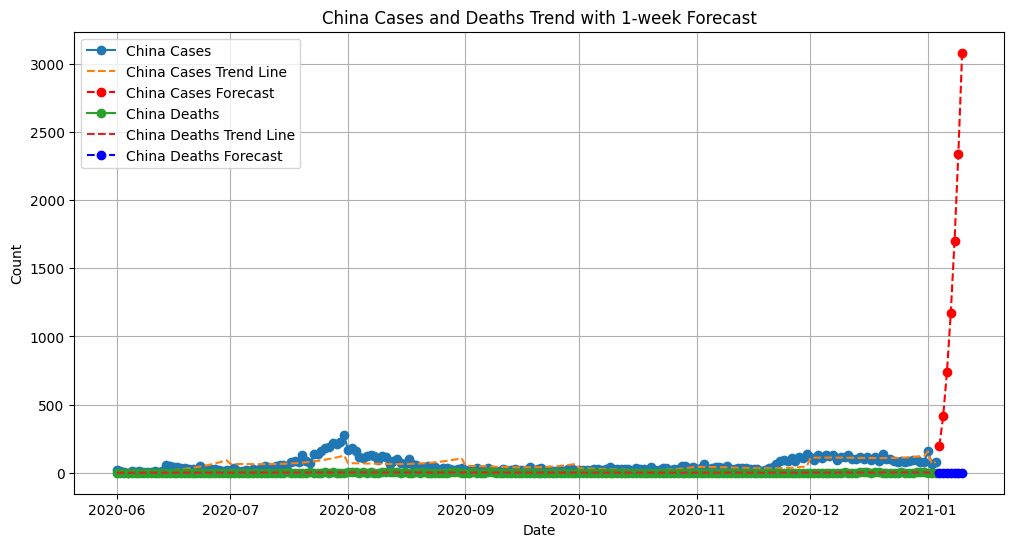

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
china_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'CHN']

china_data['date'] = pd.to_datetime(china_data['date'])

china_data['Day'] = china_data['date'].dt.day
china_data['Month'] = china_data['date'].dt.month
china_data['Year'] = china_data['date'].dt.year

X_china_cases = china_data[['Day', 'Month', 'Year']]
y_china_cases = china_data['new_cases']
poly_features_china_cases = PolynomialFeatures(degree=3)
X_poly_china_cases = poly_features_china_cases.fit_transform(X_china_cases)
poly_model_china_cases = LinearRegression().fit(X_poly_china_cases, y_china_cases)

X_china_deaths = china_data[['Day', 'Month', 'Year']]
y_china_deaths = china_data['new_deaths']


poly_features_china_deaths = PolynomialFeatures(degree=3)
X_poly_china_deaths = poly_features_china_deaths.fit_transform(X_china_deaths)
poly_model_china_deaths = LinearRegression().fit(X_poly_china_deaths, y_china_deaths)


forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_china = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_china = pd.DataFrame({'Date': forecast_dates_china, 'Day': forecast_dates_china.day, 'Month': forecast_dates_china.month, 'Year': forecast_dates_china.year})
forecast_data_china['Cases_Forecast'] = poly_model_china_cases.predict(poly_features_china_cases.transform(forecast_data_china[['Day', 'Month', 'Year']]))
forecast_data_china['Deaths_Forecast'] = poly_model_china_deaths.predict(poly_features_china_deaths.transform(forecast_data_china[['Day', 'Month', 'Year']]))


plt.figure(figsize=(12, 6))
plt.plot(china_data['date'], china_data['new_cases'], label='China Cases', marker='o')
plt.plot(china_data['date'], poly_model_china_cases.predict(X_poly_china_cases), label='China Cases Trend Line', linestyle='--')
plt.plot(forecast_data_china['Date'], forecast_data_china['Cases_Forecast'], label='China Cases Forecast', linestyle='--', marker='o', color='red')

plt.plot(china_data['date'], china_data['new_deaths'], label='China Deaths', marker='o')
plt.plot(china_data['date'], poly_model_china_deaths.predict(X_poly_china_deaths), label='China Deaths Trend Line', linestyle='--')
plt.plot(forecast_data_china['Date'], forecast_data_china['Deaths_Forecast'], label='China Deaths Forecast', linestyle='--', marker='o', color='blue')

plt.title('China Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()



## After seeiing the pttern it is noted that forecast says for the compared countries such as  CHINA the cases will be rise by the end of 2021 and INDIA the cases are going to reduce 

Predicting future trends in COVID-19 cases involves a complex interplay of various factors, and any forecast should be interpreted with caution. Several elements can contribute to the divergent forecasted trends in different countries:

Vaccination Rates:

The level of vaccination coverage is a crucial factor. If a country has successfully vaccinated a significant portion of its population, it may experience a decline in new cases and severity of illness.
Government Interventions:

The effectiveness of government interventions, such as lockdowns, social distancing measures, and public health campaigns, plays a vital role. Strict measures can help control the spread of the virus.
Healthcare System Capacity:

The capacity and resilience of a country's healthcare system are significant. Well-prepared and adequately resourced healthcare systems can better manage and treat COVID-19 cases, potentially reducing the impact.
Emergence of Variants:

The emergence and spread of new variants can impact the trajectory of the pandemic. Some variants may be more transmissible or resistant to immunity, affecting the overall case numbers.
Public Compliance:

Public compliance with preventive measures, including mask-wearing, hygiene practices, and adherence to quarantine guidelines, influences the spread of the virus.
Global Travel and Trade:

International travel and trade can contribute to the introduction of new cases. Countries with high mobility may experience fluctuations in case numbers based on global trends.
Seasonal Factors:

The seasonal nature of respiratory viruses might affect the trajectory. Some viruses, including coronaviruses, exhibit seasonal patterns, potentially influencing the rise or fall of cases.
Economic Activities:

Economic activities and reopening strategies can impact the transmission of the virus. Countries with active economies and eased restrictions may see changes in case numbers.
Public Awareness and Education:

Public awareness and education campaigns about COVID-19, including vaccine awareness, can influence behaviors and contribute to the success of containment efforts.
Adaptation and Learning:

Countries that learn from previous waves of the pandemic and adapt their strategies accordingly may be better positioned to manage future outbreaks.


## And the another reason might be the covid started first in the china then by the end of 2021 it starting an another wave 2 but for india it is end of wave 1 so the trend shows that will reduce the cases in India